In [51]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer
from qiskit.circuit import Parameter, ParameterVector
from qiskit.visualization import plot_histogram, plot_bloch_multivector

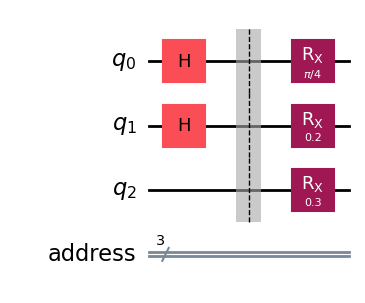

In [52]:
# Setup parameters and registers
import numpy as np


num_nodes = 4
num_qubits = 2  # For 4 nodes, log2(4) for address qubits

qr = QuantumRegister(num_qubits + 1, 'q')  # Additional qubit for embedding
cr = ClassicalRegister(num_qubits + 1, 'address')
qc = QuantumCircuit(qr, cr)

# Initialize with Hadamard gates for superposition
qc.h(qr[:num_qubits])  # Hadamard on address qubits
qc.barrier()

# Setup and apply the Parameterized Quantum Circuit (PQC)
theta = ParameterVector('theta', length=num_qubits + 1)
for i in range(num_qubits + 1):
    qc.rx(theta[i], qr[i])

bc = qc.assign_parameters({theta: [np.pi / 4, 0.2, 0.3]})
# bc.measure_all()
bc.draw('mpl')

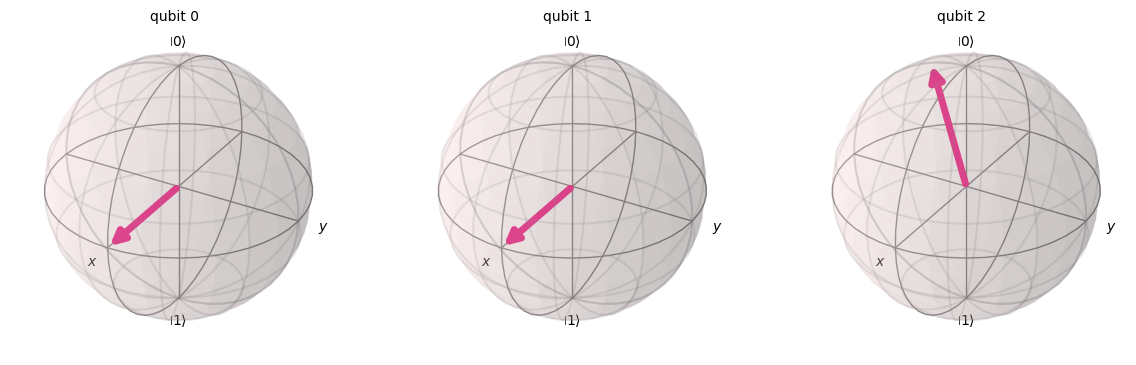

In [53]:
# Use the statevector simulator to get the quantum state
statevector_sim = Aer.get_backend('statevector_simulator')

# Execute the circuit
new_circuit = transpile(bc, statevector_sim)
job = statevector_sim.run(new_circuit)
statevector = job.result().get_statevector()

# Plotting the statevector on the Bloch sphere for each qubit
plot_bloch_multivector(statevector)